# Chapter 04 : 라쏘 모델
## 사전 지식
### 피처 선택법
주어진 데이터의 피처 개수가 많아 시간, 공간 복잡도와 해의 안정성 면에서 모델에 모든 피처를 포함하는 것이 부적절  
$\rightarrow$ 정형화된 방법을 통해 일부 피처를 예측 모델에서 제외 $\rightarrow$ 피처 선택법(feature selection)
- 필터 기반(filter-based)
- 래퍼 기반(wrapper-based)
- 임베디드(embedded)  
sklearn.feature_selection 모듈 : 피처 선택법을 수행하는 다양한 클래스와 함수를 제공

### 필터 기반 피처 선택법
- 단일 피처를 대상으로 수행
- 분석에 좋은 피처만 포함하고자 기준을 정하고, 기준을 만족하는 피처만 모델에 포함  
피처 선택법의 종류
- 목표 변수가 수치형 변수인지 범주형 변수인지에 따라(회귀 문제, 분류 문제) 달라짐
- 대상 피처가 수치형 변수인지 범주형 변수인지에 따라 달라짐
- ex) 목표 변수와 대상 피처가 모두 수치형 $\rightarrow$ 상관 계수 기반 필터 사용
- ex) 목표 변수가 범주형 변수 $\rightarrow$ 카이제곱 기반 필터 사용  
  
회귀 문제 : f_regression(), mutual_info_regression() 등의 함수 제공  
분류 문제 : chi2(), f_classif(), mutual_info_classif() 등의 함수 제공  

In [34]:
# 필터 기반 피처 선택법

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

X, y = load_digits(return_X_y = True, as_frame = True)
print(f'X의 크기 : {X.shape}')

X의 크기 : (1797, 64)


In [35]:
myfilter = SelectKBest(chi2, k = 20)   # SelectKBest 객체 선언, 데이터셋으로 학습하여 피처 20개를 선택
myfilter.fit(X, y)

cols = myfilter.get_support(indices = True)   # get_support() 메서드로 칼럼 위치를 선택
X_new = X.iloc[:, cols]   # 선택한 피처를 다시 데이터프레임 형태로 저장
print(f'필터링을 수행한 후 X의 크기 : {X_new.shape}')

필터링을 수행한 후 X의 크기 : (1797, 20)


### 래퍼 기반 피처 선택법
- 피처 선택을 적절한 피처 집합을 찾아내는 탐색 문제(search problem)로 간주
- 피처가 K개일 때 가능한 피처 조합은 $2^K - 1$개이므로 큰 숫자 K에 대해서는 전역 최적 조합을 찾는 것이 불가능
- 그리디 알고리즘(greedy algorithm)을 이용하여 지역 최적 조합을 순서대로 탐색
- 전진 선택법(forward selection) : 주어진 조건 하에서 이터레이션 별로 피처를 추가하면서 모델링을 반복
- 후진 소거법(backward elemination) : 전체 피처 집합에서 피처를 줄이면서 모델링을 반복
- 성능 : 데이터 적합도에 피처 개수 패널티가 반영되는 아카이케 정보기준(Akaike information criterion, AIC) 등을 사용  

#### 그리디 알고리즘이란?
- 순차적 선택 문제에서 각 단계에서의 최적값을 선택하는 알고리즘
- 전역적인 최적해를 보장할 수는 없는 알고리즘
- 전체 순열을 고려한 전역적인 해 탐색은 시간의 문제 때문에 불가능한 경우가 많으며, 이때 좋은 선택지
  
1. 피처가 정해진 숫자에 도달할 때까지 이터레이션을 수행하는 방법 $\rightarrow$ sklearn.feature_selection.RFE 클래스
2. 이터레이션 별로 모델의 성능을 측정한 다음 성능값의 변화량을 정지 조건으로 해서 이터레이션을 종료하는 방법 $\rightarrow$ sklearn.feature_selection.SequentialFeatureSelector 클래스
  
RFE 클래스
- 정해진 피처 개수에 도달할 때까지 후진 소거법을 수행
- 후진 소거법을 적용할 지도 학습 모델을 정함
- 지정한 숫자의 피처에 도달할 때까지 이터레이션(iteration)을 수행
- 학습과 피처 제거를 반복
- 피처 중요도(feature importance) 정의할 수 있어야 함 $\rightarrow$ 모델의 계수나 피처 중요도에 대한 어트리뷰트가 있어야 함  
  
RFE 클래스의 주요 하이퍼파라미터  
estimator  
- 주요값 : Estimator 객체
- 기본값 : -
- 의미 : fit() 메서드를 가지고 피처 중요도 정보를 저장할 수 있는 지도 학습 객체
  
n_features_to_select  
- 주요값 : int, 0 < float < 1, None
- 기본값 : None
- 의미 : 선택할 피처 개수 or 비율
    - None : 피처의 절반이 선택
    - int : 선택할 피처의 개수
    - float : 선택할 피처 수의 비율
  
step  
- 주요값 : int >= 1, 0 < float < 1
- 기본값 : 1
- 의미 : 각 이터레이션에서 제거할 피처 개수 or 비율
    - int : 각각의 이터레이션에서 제거할 피처 개수
    - float : 각각의 이터레이션에서 제거할 피처의 비율
  
실제 사용 시 활용 팁
- 학습한 RFE 객체의 support_어트리뷰트를 통해 선택된 피처를 확인할 수 있음
    - 피처의 개수만큼의 차원을 가지는 배열 타입
    - 선택된 피처 : True
    - 제거된 피처 : False
- ranking_ 어트리뷰트 : 후진 소거법 과정에서 추정한 피처의 순위값
    - 선택된 피처 : 모두 순위가 1
    - 탈락한 피처 : 나중에 탈락할수록 순위가 1에 가까움
- 교차검증법으로 결과의 일반화 가능성을 높이고 싶으면 sklearn.feature_selection.RFECV 클래스 사용
    - RFECV 클래스 : 피처 개수를 지정하는 대신 교차검증법을 통해 적절한 피처 개수를 찾음

#### 임베디드 피처 선택법
- 머신러닝 모델에서는 모델링 결과와 함께 피처 선택을 같이 진행 $\rightarrow$ 임베디드 피처 선택법
- 라쏘(LASSO), 엘라스틱 넷(elastic net) 등이 이에 해당  
  
#### 좌표 하강법과 하방미분

좌표 하강법
- 좌표별 최적화(coordinate-wise optimization)를 수행
- 각 단계에서 한 좌표(피처)에서만 업데이트가 일어나며 나머지 피처는 상수로 고정됨  
  
- 한 번에 하나의 좌표에 대해서만 비용 함수의 값을 갱신
1. 초깃값 $x^{(0)} = (x_1^{(0)}, x_2^{(0)}, \dots, x_n^{(0)})$에서 시작
2. (k + 1)번째 이터레이션에서는 $x^{(k + 1)}$을 $x^{(k)}$로부터 정의
    - $x_i^{(k + 1)} = argmin_w f(x_1^{(k+1)}, \dots, x_{i-1}^{(k+1}, w, x_{i+1}^{(k)}, \dots, x_n^{(k)})$
    - argmin을 선택하는 방법 $x_i^{(k+1)} = x_i^{(k)} - \lambda\frac{\partial f}{\partial x_i}(x)$
    - $i = 1, \dots, n$까지의 $x_i$에 대해 순서대로 반복
3. 각각의 $t$에 대하여 $x_{t + 1} = x_t - \Delta f'(x_t)$에 따라 2의 방법으로 반복 계산하고 업데이트함
  
  
하방미분 정리
- 하방미분(subdifferential) : 미분을 확장
- 비용 함수를 최적화할 때 사용
- 컨벡스 함수 $f$와 $g$가 주어졌을 때 성립
1. $f$가 $x_0$에서 미분 가능하면 하방미분값은 $x_0$의 미분값에 해당하는 한 점으로만 구성, 역 또한 성립
2. $f$와 $g$의 하방미분 $\partial f$와 $\partial g$가 존재한다면, $f + g$의 하방미분은 $\partial (f + g) = \partial f + \partial g$을 만족함
3. $x_0$가 $f$의 전역 최솟값(global minimum)일 경우 그 $x_0$에서의 하방미분 $\partial f(x_0)$은 원점을 포함하며, 역 또한 성립함

## 1. 라쏘(LASSO) 모델이란?
- 희소 데이터셋(sparse dataset)에서 파라미터를 추정하는 선형 모델
- 예측에 사용하는 변수의 숫자를 줄이는 피처 선택법의 일종
- 피처의 수를 줄여야하는 상황에서 매우 유용
- 압축 센싱(compressed sensing) 분야를 포함하여 필요한 피처를 추출해야 하는 도메인에서 중요하게 사용

#### 원 핫 인코딩(one hot encoding)
- 범주형 변수를 수치형 변수로 변환하여 활용하기 위한 방법
- 범주형 변수의 각 레이블 값에 대응하는 이진 변수(binary variable)를 생성
- 더미 변수(dummy variable) : 원 핫 인코딩을 통해 얻은 이진 변수

#### 희소 데이터셋
- 샘플-피처 행렬 표현에서 데이터가 실제로 존재하는 공간의 비율이 매우 작은 데이터셋
- 범주형 변수로 구성된 피처 행렬이 있을 때 변수별로 레이블 수가 많을수록 원 핫 인코딩을 적용한 데이터셋은 희소 데이터셋이 됨
- 범주형 변수가 a개의 레이블로 구성, b개의 샘플을 가지고 있을 경우, 원 핫 인코딩 적용 후에는 행렬 원소의 수는 axb나 그중 0이 아닌 값을 가지는 원소는 a개 밖에 없으므로 1/a의 비율만 값이 존재
- 고유한 단어의 수가 많은 텍스트 분석에서 더욱 극심해짐
- 시간, 공간 복잡도 측면에서 매우 비효율적이므로 scipy.sparse.csr_matrix()와 같은 희소 데이터 전용 형태로 전환하여 분석을 수행

라쏘의 비용 함수 = OLS 비용 함수 + L1 규제항  
$J_{OLS}(w) = \parallel y - Xw \parallel_2^2$  
  
샘플 개수 n에 대해 정규화  
$\hat{J}_{OLS}(w) = \frac{1}{2n} \parallel y - Xw \parallel_2^2$  
  
L1 규제항을 더한 것이 라쏘의 비용 함수  
($\frac{1}{2n}$으로 나눈 것 : 샘플 개수의 증가에 따른 비용 함수의 증가분을 감쇄하려는 것  
$J_{LASSO}(w) = \frac{1}{2n} \parallel y - Xw \parallel_2^2 + \alpha \parallel w \parallel_1$  

- 라쏘 모델 : OLS 모델의 비용 함수에 $\alpha \parallel w \parallel_1$ 페널티를 더한 것
- 비용 함수를 최소화하는 파라미터 w를 추정
- $\parallel w \parallel_1$ : 파라미터 w의 L1-norm
- $\alpha$ : 규제의 강도
- $\alpha$값이 커질수록 더 많은 수의 피처 계수가 0이 되는 효과 발생

## 2. 라쏘 모델 구현하기
### 라쏘 모델의 이론
라쏘 비용 함수 전개  
$J_{LASSO}(w) = \hat{J}_{OLS}(w) + \alpha \parallel w \parallel_1$  
$\qquad \qquad \; = \frac{1}{2n}\parallel y - Xw \parallel_2^2 + \alpha \parallel w \parallel_1$  
$\qquad \qquad \; = \frac{1}{2n} \displaystyle\sum_{i = 1}^{n} \Bigg [ y^{(i)} - \displaystyle\sum_{j = 1}^{p} w_jx_j^{(i)} \Bigg ] ^2 + \alpha \displaystyle\sum_{j = 1}^{p} |w_j|$  
 
 
왼쪽 OLS 비용 함수 부분을 $w_j$에 대하여 편미분  
$\frac{\partial}{\partial w_j}\hat{J}_{OLS}(w) = -\frac{1}{n} \displaystyle\sum_{i = 1}^{n} x_j^{(i)} \Bigg [ y^{(i)} - \displaystyle\sum_{j = 1}^{p} w_jx_j^{(i)} \Bigg ]$  
$\qquad \qquad \quad = -\frac{1}{n} \displaystyle\sum_{i = 1}^{n} x_j^{(i)} \Bigg [ y^{(i)} - \bigg ( \displaystyle\sum_{k \neq j}^{p} w_kx_k^{(i)} \bigg ) - w_jx_j^{(i)} \Bigg ]$  
$\qquad \qquad \quad = \frac{1}{n} \displaystyle\sum_{i = 1}^{n} x_j^{(i)} \Bigg [ y^{(i)} - \displaystyle\sum_{k \neq j}^{p} w_kx_k^{(i)} \Bigg ] + w_j \frac{\displaystyle\sum_{i = 1}^{n} (x_j^{(i)})^2}{n}$  
$\qquad \qquad \quad \doteq \rho_j + w_jz_j$  
  
  
라쏘 비용 함수 오른쪽의 L1 페널티 항 전개  
$\alpha \displaystyle\sum_{j = 1}^{p} |w_j| = \alpha |w_j| + \alpha \displaystyle\sum_{k \neq j}^{p} |w_k|$  
  
  
L1 페널티 항 전개식의 양변에 하방미분  
$\partial_{w_j} \bigg ( \alpha \displaystyle\sum_{j = 1}^{p} |w_j| \bigg ) = \partial_{w_j} \alpha |w_j| = \begin{cases} -\alpha \qquad\quad\;\; if \qquad w_j < 0 \\ [-\alpha, \alpha] \qquad if \qquad w_j = 0 \\ \alpha \qquad\qquad if \qquad w_j > 0 \end{cases}$  
  
  
OLS 항과 L1 페널티 항 각각 w에 대한 컨벡스 함수 $\rightarrow$ 라쏘 비용 함수 또한 컨벡스 함수  
$J_{LASSO}(w) = \hat{J}_{OLS}(w) + \alpha \parallel w \parallel_1$  
  
  
하방미분 정리 3가지 결합 $\rightarrow$ 라쏘 비용 함수의 전역 최솟값 계산  
$\partial_{w_j}J_{LASSO}(w) = \partial_{w_j}\hat{J}_{OLS}(w) + \partial \parallel w \parallel_1$  
$0 = -\rho_j + w_jz_j + \partial_{w_j} \alpha |w_j| = \begin{cases} -\rho_j + w_jz_j - \alpha \qquad if \quad w_j < 0 \\ [-\rho_j - \alpha, -\rho_j + \alpha] \quad if \quad w_j = 0 \\ -\rho_j + w_jz_j + \alpha \qquad if \quad w_j > 0 \end{cases}$  
  
  
부드러운 임계 함수(soft threshold function) $S(\rho_j, \alpha)$를 정의  
$S(\rho_j, \alpha)$ : $-\alpha$와 $\alpha$ 사이에서 0으로 감쇄(shrink)시키는 역할  
$w_j = \frac{1}{z_j}S(\rho_j, \alpha) \doteq \begin{cases} \frac{\rho_j + \alpha}{z_j} \quad if \quad \rho_j < -\alpha \\ 0 \qquad if \quad -\alpha \leq \rho_j \leq -\alpha \\ \frac{\rho_j - \alpha}{z_j} \quad if \quad \rho_j > \alpha \end{cases}$  
$\alpha$ : 임계값(threshold)  
$z_j$ : 스케일을 줄여주는 정규화 상수(normalizing constant)  
  
#### 좌표 하강법을 이용한 라쏘 모델의 최적화 알고리즘
1. $j = 1, \dots, p$에 대하여 $z_j \doteq \frac{1}{n} \displaystyle\sum_{i = 1}^{1} (x_j^{(i)})^2$ 성립
2. 수렴하거나 이터레이션 상한선에 도달할 때까지 좌표별 하강 반복  
$For j = 1, \dots, p:$  
$\rho_j \doteq \frac{1}{n} \displaystyle\sum_{i = 1}^{n} x_{j}^{(i)} \bigg ( y^{(i)} - \displaystyle\sum_{k \neq j}^{p} w_kx_k^{(i)} \bigg )$  
$w_j \doteq \frac{1}{z_j}S(\rho_j, \alpha)$  


### 라쏘 모델의 구현
- 좌표 하강법을 이용하여 라쏘 모델을 구현
- $\alpha$별 라쏘 파라미터를 구하고 이를 그래프로 나타냄
- 구현 편의상 절편은 고려하지 않음
- 목푯값의 평균이 0이 되도록 필요한 패키지와 데이터를 불러온 후 평균 중심화를 먼저 수행

In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_diabetes
%matplotlib inline

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
y = y - y.mean()

In [37]:
# sotf_threshold() 함수 구현 (부드러운 임계 함수)
def soft_threshold(rho, alpha):
    if (rho < -alpha):
        return rho + alpha
    elif (rho > alpha):
        return rho - alpha
    else:
        return 0
    
# 좌표 하강법 구현
def coordinate_descent_lasso(X, y, alpha = .01, num_iters = 100):
    n, p = X.shape
    w = np.ones((p, ))
    z = np.ones((p, ))
    
    for j in range(p):
        X_j = X[:, j].reshape(-1, 1)
        z[j] = np.inner(X[:, j], X[:, j]) / n
        
    for i in range(num_iters):
        for j in range(p):
            rho = np.inner(X[:, j], y - np.matmul(X, w) + w[j] * X[:, j]) / n
            w[j] = 1 / z[j] * soft_threshold(rho, alpha)
            
    return w.flatten()

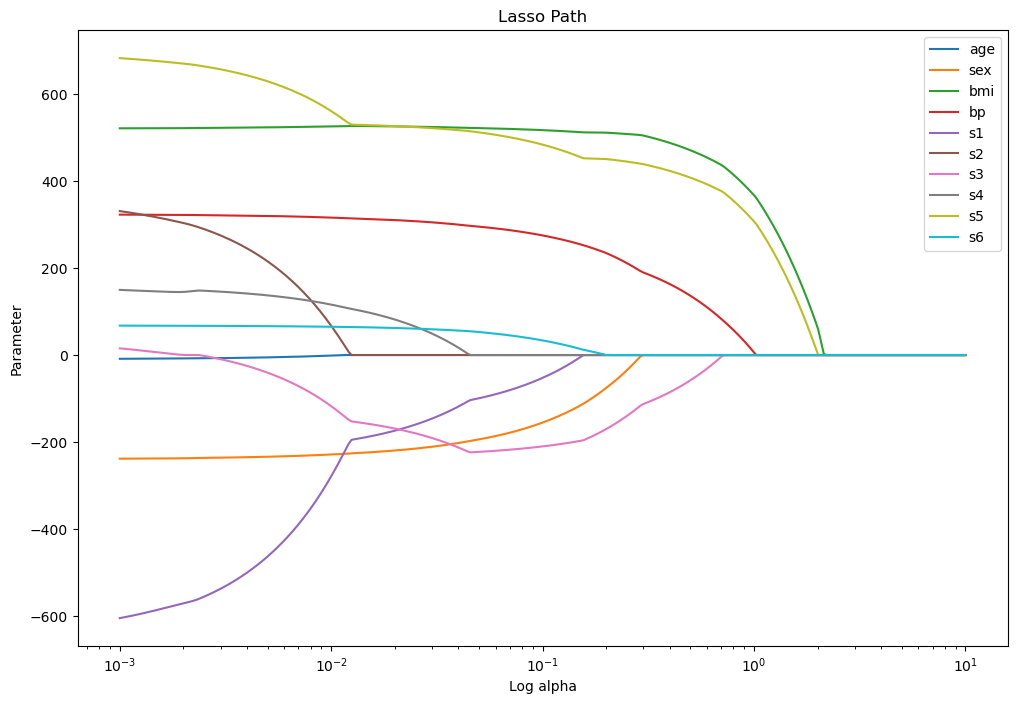

In [38]:
# alpha 별로 라쏘 모델을 학습하고 파라미터 추정 결과를 그래프로 나타냄
ws = []
alphas = np.logspace(-3, 1, 300)

for alpha in alphas:
    w = coordinate_descent_lasso(X, y, alpha = alpha, num_iters = 100)
    ws.append(w)
    
w_lasso = np.stack(ws).T

plt.figure(figsize = (12, 8))
for i in range(w_lasso.shape[0]):
    plt.plot(alphas, w_lasso[i], label = diabetes.feature_names[i])
    
plt.xscale('log')
plt.xlabel('Log alpha')
plt.ylabel('Parameter')
plt.title('Lasso Path')
plt.legend()

## 3. 패키지로 표현하기
sklearn.linear_model.Lasso 클래스 : 좌표 하강법을 통해 라쏘 비용 함수를 최적화하여 파라미터를 학습  
Lasso 클래스의 주요 파라미터
- alpha
    - 주요값 : float > 0
    - 기본값 : 1.0
    - 의미 : L1 규제 페널티 계수, 비용 함수에서의 $\alpha$에 해당, alpha가 0에 가까워질수록 OLS 해에 수렴

- fit_intercept
    - 주요값 : bool
    - 기본값 : True
    - 의미 : 절편 포함 여부 결정

- max_iter
    - 주요값 : int > 0
    - 기본값 : 1000
    - 의미 : 이터레이션 횟수의 상한선
    
- tol
    - 주요값 : float > 0
    - 기본값 : 1e-4
    - 의미 : 조기 종료에 대한 허용 오차, 이터레이션에 따른 업데이트의 값이 tol보다 작을 때 추가 조건을 확인하고 조기 종료를 결정
    
- positive
    - 주요값 : bool
    - 기본값 : False
    - 의미 : 파라미터 제약 조건
        - True : 모든 파라미터가 0 이상의 값을 가지도록 강제
        
- selection
    - 주요값 : 'cyclic', 'random'
    - 기본값 : 'cyclic'
    - 의미 : 계수의 업데이트 방식
        - 'cyclic' : 정해진 순으로 계수를 업데이트
        - 'random' : 매 이터레이션에서 계수를 랜덤한 순서로 업데이트 (특정 조건에서 수렴 속도가 매우 빨라질 수 있음)
        
- random_state
    - 주요값 : None, int
    - 기본값 : None
    - 의미 : selection이 'random'일 때 랜덤성을 제어하고자 사용
  
    
실제 사용 시 활용 팁  
- 비용 함수에 규제항이 포함되므로 특정 피처 범위 때문에 비용 함수가 큰 영향을 받지 않으려면 피처 스케일링을 선행해야 함
- 규제 페널티의 계수 하이퍼파라미터 alpha의 값에 따라서 선택되는 피처와 학습 결과가 크게 영향을 받으므로 적절한 alpha 설정이 가장 중요

In [39]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

X, y = load_diabetes(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
221,-0.045472,-0.044642,-0.038540,-0.026328,-0.015328,0.000878,-0.032356,-0.002592,0.001144,-0.038357
176,0.045341,0.050680,0.019662,0.039087,0.020446,0.025930,0.008142,-0.002592,-0.003304,0.019633
227,0.067136,0.050680,-0.029918,0.057449,-0.000193,-0.015719,0.074412,-0.050564,-0.038459,0.007207
434,0.016281,-0.044642,0.001339,0.008101,0.005311,0.010899,0.030232,-0.039493,-0.045421,0.032059
110,0.041708,0.050680,-0.032073,-0.022885,-0.049727,-0.040144,0.030232,-0.039493,-0.126097,0.015491


- 피처의 표준 스케일링(standard scaling) 이후 학습하는 과정을 Pipeline으로 진행
- alpha = 10, random_state = 1234 (재현성 위해)
- 평균 절재 오차(MAE) 계산

In [40]:
scaler = StandardScaler()
reg = Lasso(alpha = 10, random_state = 1234)

pipe = Pipeline(steps = [("scaler", scaler), ("reg", reg)])
pipe = pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print(f'학습 데이터셋 MAE : {np.abs(y_train_pred - y_train).mean() : .3f}')
print(f'테스트 데이터셋 MAE : {np.abs(y_pred - y_test).mean() : .3f}')

학습 데이터셋 MAE :  47.475
테스트 데이터셋 MAE :  46.139


In [41]:
# 선택한 피처를 확인 -> reg 객체의 coef_ 어트리뷰트 출력
print('추정 파라미터의 값')
print(reg.coef_)

# 10개의 피처 중 6개의 피처가 예측에서 배제
# bmi, bp, s3, s5 등 4개의 피처만 선택
# 4개의 피처는 목푯값 예측에 가장 많이 기여하는 상위 4개로 해석 가능

추정 파라미터의 값
[ 0.         -0.         22.14741042  7.25438995 -0.         -0.
 -4.43633143  0.         18.8046418   0.        ]


In [42]:
# 값 -0.은 0과 동일한 값
# IEEE 754 표준 준수를 위해 numpy 패키지에서 구현한 결과
print('re.coef_[0]의 클래스 : ', type(reg.coef_[0]))
print('re.coef_[1]의 클래스 : ', type(reg.coef_[1]))
print('re.coef_[0]과 0의 동일 여부 : ', reg.coef_[0] == 0)
print('re.coef_[1]과 0의 동일 여부 : ', reg.coef_[1] == 0)

re.coef_[0]의 클래스 :  <class 'numpy.float64'>
re.coef_[1]의 클래스 :  <class 'numpy.float64'>
re.coef_[0]과 0의 동일 여부 :  True
re.coef_[1]과 0의 동일 여부 :  True


## 4. 라쏘 모델 보충 수업
### LARS 기반 라쏘 모델
- sklearn.linear_model.LassoLars 클래스 : LARS(least-angle regression) 모델을 이용하여 라쏘 모델을 최적화

### 모델 선택법
모델 선택법(model selection)
- 가능한 여러 가지 경쟁 모델(competing model) 중 가장 적절한 모델을 선택하는 방법
- 좁은 측면 : 모델의 여러 후보 하이퍼파라미터 조합 중 최고의 성능을 내는 가장 적절한 하이퍼파라미터 조합을 선택  
$\rightarrow$ 하이퍼파리미터 튜닝(hyperparameter tuning)
- 넓은 측면 : 성능과 모델 복잡도(model complexity) 간의 상충 관계(trade-off)까지 고려할 수 있음  
  
적절한 모델의 기준
- 샘플 내 기준(in-sample criteria) : 학습 데이터셋과 모델을 통해 산출한 가능도(likelihood) 등을 비교해 산출
    - 결정 계수 $R^2$, 아카이케 정보기준(Akaike information criterion, AIC), 베이즈 정보기준(Bayes information criterion, BIC) 등 통계 관점
- 샘플 외 기준(out-sample criteria) : 별도로 준비한 검증 데이터셋 등에 모델을 적용해 성능을 비교해 산출
    - 교차검증법

#### 정보기준 기반 모델 선택법
- LassoLarsIC 클래스 이용 : AIC, BIC 등의 정보기준을 계산, 모델 선택
- 정보기준 : 모델 학습 결과를 그대로 이용할 수 있음  
$\rightarrow$ 정보 기반 모델 선택법 시간 복잡도 측면에서 유리
- 정보기준을 이용한 계산에는 신뢰성 있는 결과를 위해 큰 수의 샘플이 필요
- 피처 개수가 샘플 개수보다 많으면 좋은 모델링에 실패할 수 있음
    
$AIC = -2log\hat{L} + 2p$
- $\hat{L}$ : 모델로 추정한 최대 가능도(maximum likelihood)
- $p$ : 피처 개수
  
$BIC = -2log\hat{L} + plogn$
- $p$의 계수를 2에서 샘플 개수 $n$의 로그값으로 보정한 것
  
오차항이 정규분포를 따른 OLS 모델에서의 최대 로그 가능도  
$log\hat{L} = -\frac{n}{2}log2\pi - \frac{n}{2}log\sigma^2 - \frac{\sum_{i = 1}^{n} (y_i - \hat{y}_i)^2}{2\sigma^2}$  
  
$\rightarrow$ $AIC = nlog2\pi\sigma^2 + \frac{\sum_{i = 1}^{n} (y_i - \hat{y}_i)^2}{\sigma} + 2p$  
  
$\hat{\sigma}^2 = \frac{\sum_{i = 1}^{n} (y_i - \hat{y}_i)^2}{n - p}$
- 사용자가 추정값을 명시 X : LassoLarsIC 클래스는 기본적으로 $\sigma^2$ 값을 불편추정량(unbiased estimator)으로 추정
- $\hat{y}_i$ : OLS로 예측한 목푯값
- 샘플 개수가 피처 개수보다 클 때만 유효  
  
#### 교차검증법
교차검증법(cross validation)
- 학습 데이터셋을 K개의 서브데이터로 무작위 분할
- 이 중 (K - 1)개의 서브데이터를 학습에, 1개를 검증에 사용하는 방식을 K개 경우의 수에 대해 각각 적용하고 이의 평균 성능을 산출하는 방법
- 성능은 K개 성능의 평균값으로 잘 정의 가능 but, 파라미터는 평균값으로 정의할 수 없음  
$\rightarrow$ 교차검증법 : 하이퍼파라미터 튜닝 방법일 뿐 파라미터 자체를 구하는 방법은 아님  
  
라쏘에서는 하이퍼파리미터 $\alpha$값을 선택하는 것이 매우 중요
- sklearn 패키지의 LassoCV와 LassoLarsCV 클래스 : 교차검증으로 라쏘의 $\alpha$ 하이퍼파리미터를 선택하는 모델 선택법을 수행
- LassoCV 클래스 : 공선성이 많은 고차원 데이터
- LassoLarsCV 클래스 : 다양한 $\alpha$값을 찾을 때 도움, 샘플 개수가 피처 개수에 비해 매우 작을 때 LassoCV보다 빠른 경향

In [43]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y = True, as_frame = True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


- 라쏘에 따른 피처 선택법의 효과를 더 분명하게 나타내고자 기존 피처 행렬에 랜덤안 14개의 피처를 추가하여 전체 피처 행렬을 구성
- 14개의 피처가 모델 선택법을 통해 배제된다는 것을 확인하는 것이 목표

In [44]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(1234)   # rng : 분석의 재현성을 위해 사용
X_random = pd.DataFrame(rng.randn(X.shape[0], 14), columns = [f"random_{i:02d}" for i in range(14)])
X = pd.concat([X, X_random], axis = 1)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,random_04,random_05,random_06,random_07,random_08,random_09,random_10,random_11,random_12,random_13
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,...,-0.720589,0.887163,0.859588,-0.636524,0.015696,-2.242685,1.150036,0.991946,0.953324,-2.021255
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,...,1.321158,-1.546906,-0.202646,-0.655969,0.193421,0.553439,1.318152,-0.469305,0.675554,-1.817027
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,...,1.047579,1.045938,0.863717,-0.122092,0.124713,-0.322795,0.841675,2.390961,0.076200,-0.566446
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,...,-0.136795,0.018289,0.755414,0.215269,0.841009,-1.445810,-1.401973,-0.100918,-0.548242,-0.144620
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,...,-0.974236,-0.070345,0.307969,-0.208499,1.033801,-2.400454,2.030604,-1.142631,0.211883,0.704721


- LassoLarsIC 클래스를 이용하여 AIC와 BIC를 이용한 정보기준 모델 선택법을 수행
- 규제 페널티 항 $\alpha$에 대한 최적값을 찾음
- 모델 학습 전 데이터를 StandardScaler 클래스로 표준화
- 교차검증법과 비교하고자 학습에 걸리는 시간 또한 측정
  
AIC로 모델 선택을 수행
- make_pipeline() 함수 : 파이프라인을 수행하는 함수, sklearn.pipeline.Pipeline 클래스와 활용 방법이 비슷

In [45]:
import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

start_time = time.time()
lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion = "aic", normalize = False)).fit(X, y)

fit_time = time.time() - start_time

- $\alpha$별로 학습한 모델의 AIC값을 results 데이터프레임으로 저장
- 최소 AIC를 얻는 $\alpha$값을 찾아 alpha_aic에 저장

In [46]:
results = pd.DataFrame({"alphas" : lasso_lars_ic[-1].alphas_,
                        "AIC criterion" : lasso_lars_ic[-1].criterion_}).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

print(f'alpha_aic : {alpha_aic : .3f}')

alpha_aic :  1.981


In [47]:
# BIC도 계산
lasso_lars_ic.set_params(lassolarsic__criterion = "bic").fit(X, y)

results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

print(f'alpha_bic : {alpha_bic : .3f}')

alpha_bic :  4.516


- 각 $\alpha$값의 AIC와 BIC 값을 그래프로 나타냄
- 수직선으로 표현한 값은 각각 최소 AIC와 BIC를 산출하는 $\alpha$ 의미
- 코드 실행 시간 또한 기록

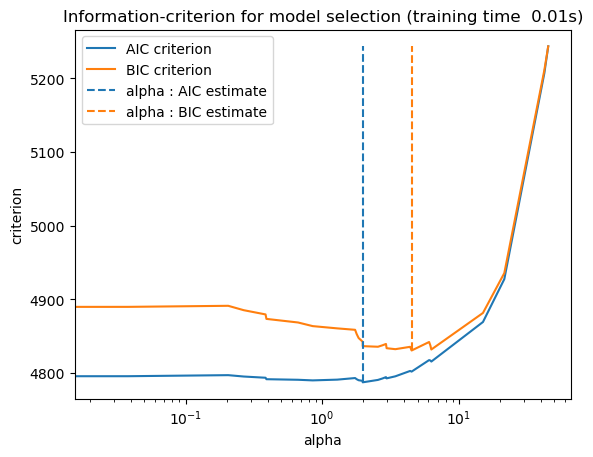

In [48]:
ax = results.plot()
ax.vlines(alpha_aic,
          results["AIC criterion"].min(),
          results["AIC criterion"].max(),
          label = "alpha : AIC estimate",
          linestyles = '--',
          color = "tab:blue")

ax.vlines(alpha_bic,
          results["BIC criterion"].min(),
          results["BIC criterion"].max(),
          label = "alpha : BIC estimate",
          linestyles = '--',
          color = "tab:orange")

ax.set_xlabel('alpha')
ax.set_ylabel('criterion')
ax.set_xscale('log')
ax.legend()
_ = ax.set_title(f"Information-criterion for model selection (training time {fit_time : .2f}s)")

- 교차검증법으로 하이퍼파라미터 튜닝을 수행
- LassoCV or LassLarsCV 클래스에서 제공
- LassoCV를 사용한 20-fold 교차검증법으로 $\alpha$를 튜닝
- StandardScaler 클래스로 피처 크기를 표준화하고 모델을 학습
- 학습에 소요된 시간을 측정
- $\alpha$에 후보값을 지정하지 않으면 100개의 $\alpha$를 자동으로 지정함

In [49]:
from sklearn.linear_model import LassoCV

start_time = time.time()

model = make_pipeline(StandardScaler(), LassoCV(cv = 20)).fit(X, y)

fit_time = time.time() - start_time

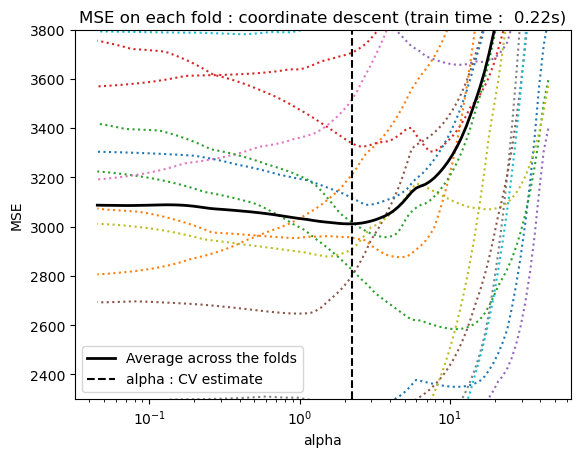

In [51]:
lasso = model[-1]

plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle = ":")
plt.plot(lasso.alphas_,
         lasso.mse_path_.mean(axis = -1),
         color = "black",
         label = "Average across the folds",
         linewidth = 2)

plt.axvline(lasso.alpha_,
            linestyle = "--",
            color = "black",
            label = "alpha : CV estimate")

plt.ylim(2300, 3800)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
_ = plt.title(f"MSE on each fold : coordinate descent (train time : {fit_time : .2f}s)")

### 4장 되새김 문제
#### 1. 스케일링과 LassoCV 파이프라인
- 당뇨병 데이터셋을 라쏘 모델로 학습하고 결과를 평가
- 최적의 $\alpha$값을 찾고자 학습 데이터셋에 10-fold 교차검증법을 적용

In [52]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np

X, y = load_diabetes(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

- 다음 단계를 순서대로 수행하는 sklearn.pipeline.make_pipeline() 함수를 만들고 make_pipeline() 함수를 X_train, y_train으로 학습하라.
1. 피처에 대한 표준 스케일링(standard scaling) 수행
2. LassoCV 클래스로 $\alpha = [0.01, 0.1, 1, 10, 100]$을 10-fold 교차검증으로 테스트
  
- 학습 결과 가장 좋은 성능을 산출하는 $\alpha$를 찾고, 그 $\alpha$를 적용했을 때의 피처 계수와 테스트 데이터 기준 평균 절대 오차(MAE)를 구하라.

In [54]:
lassoCV = LassoCV(alphas = [0.01, 0.1, 1, 10, 100], cv = 10)
model = make_pipeline(StandardScaler(), lassoCV).fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'최적의 alpha : {lassoCV.alpha_}')
print('계수')
print(lassoCV.coef_)
print(f'MAE : {np.abs(y_pred - y_test).mean() : .3f}')

최적의 alpha : 1.0
계수
[ -0.         -11.51765404  23.99105458  14.40703304  -5.33719989
  -0.          -9.73608914   2.29161593  23.67465157   3.04274953]
MAE :  42.992


#### 2. 불필요한 피처가 많은 상태에서 선형 모델 비교하기
- 샘플의 개수 : n, 피처의 개수 : p
- p >> n 이면서 피처 행렬이 불필요한 피처를 다수 포함할 때의 OLS 모델 성능을 구하고 이를 라쏘 모델과 비교
- 부정 방정식(indeterminate equation) : 해가 무한한 연립 방정식
- 머신러닝의 관점에서 부정 방정식 : 0의 MSE값을 달성한다는 의미

In [56]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

X, y = make_regression(n_samples = 300,
                       n_features = 400,
                       n_informative = 50,
                       n_targets = 1,
                       bias = 0.0,
                       noise = 10.0,
                       random_state = 1234)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

- OLS 모델로 (X_train, y_train) 쌍을 학습하고 이를 (X_test, y_test) 쌍에 적용하여 MSE를 계산하라.
- 라쏘 모델로도 동일한 분석을 한 후 이를 OLS 결과와 비교하라.

In [59]:
reg = LinearRegression()
reg = reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
print(f'학습 데이터셋 기준 OLS 모델의 MSE : {((y_train - y_train_pred)**2).mean() : .2f}')

y_test_pred = reg.predict(X_test)
print(f'테스트 데이터셋 기준 OLS 모델의 MSE : {((y_test - y_test_pred)**2).mean() : .2f}')

학습 데이터셋 기준 OLS 모델의 MSE :  0.00
테스트 데이터셋 기준 OLS 모델의 MSE :  66007.72


In [61]:
lasso = Lasso()
lasso = lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
print(f'학습 데이터셋 기준 LASSO 모델의 MSE : {((y_train - y_train_pred)**2).mean() : .2f}')

y_test_pred = lasso.predict(X_test)
print(f'테스트 데이터셋 기준 LASSO 모델의 MSE : {((y_test - y_test_pred)**2).mean() : .2f}')

학습 데이터셋 기준 LASSO 모델의 MSE :  130.41
테스트 데이터셋 기준 LASSO 모델의 MSE :  457.40
